# LTSM Neural Networks

### Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points, but also entire sequences of data. (Wikipedia)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1171 entries, 2014-01-02 to 2018-08-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1171 non-null   float64
 1   High       1171 non-null   float64
 2   Low        1171 non-null   float64
 3   Close      1171 non-null   float64
 4   Adj Close  1171 non-null   float64
 5   Volume     1171 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 64.0 KB


In [4]:
df['Adj Close'].describe()

count    1171.000000
mean        7.000196
std         4.860349
min         1.620000
25%         2.705000
50%         4.270000
75%        11.550000
max        23.980000
Name: Adj Close, dtype: float64

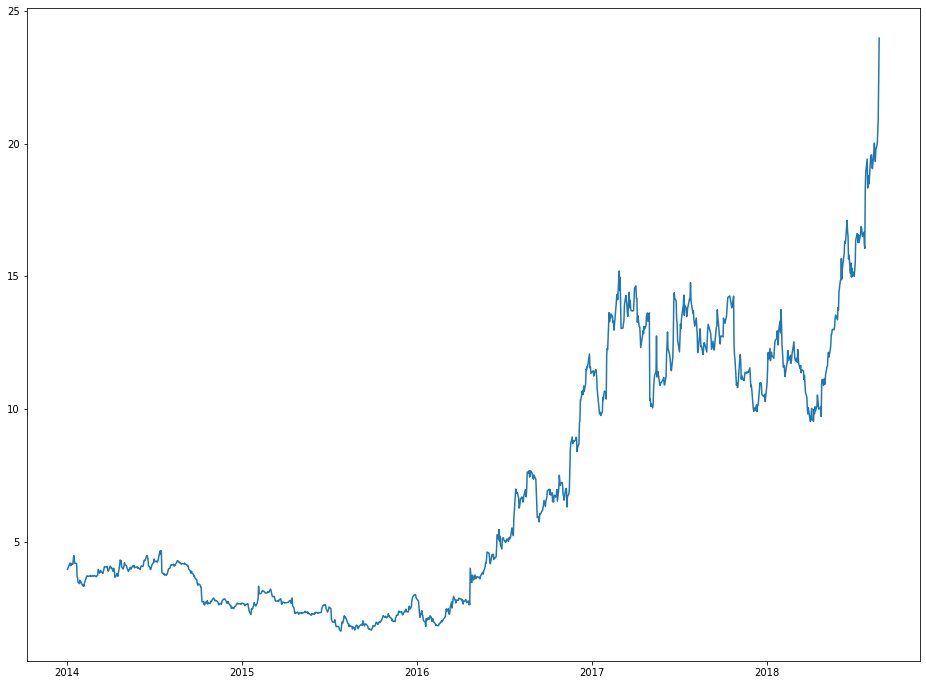

In [5]:
plt.figure(1, figsize=(16,12))
_= plt.plot(df['Adj Close'])

In [6]:
df['Returns'] = df['Adj Close'].pct_change()

In [7]:
df['Log_returns'] = np.log(1+df['Returns'])

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_returns
Date,,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,NaN,NaN
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,0.012658,0.012579
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,0.032500,0.031983
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0.012106,0.012034
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0.000000,0.000000


In [9]:
df.dropna(inplace=True)
X = df[['Adj Close', 'Log_returns']].values

In [10]:
X

array([[4.00000000e+00, 1.25787701e-02],
       [4.13000011e+00, 3.19830736e-02],
       [4.17999983e+00, 1.20337708e-02],
       ...,
       [2.08999996e+01, 2.42142586e-02],
       [2.22900009e+01, 6.43890478e-02],
       [2.39799995e+01, 7.30819420e-02]])

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

In [13]:
X_scaled[:5]

array([[0.10644007, 0.4154788 ],
       [0.11225403, 0.44327577],
       [0.11449016, 0.41469808],
       [0.11449016, 0.39745951],
       [0.11046513, 0.36627908]])

In [14]:
y = [x[0] for x in X_scaled]

In [15]:
y[:5]

[0.10644007354488252,
 0.11225403227162939,
 0.11449015547967875,
 0.11449015547967875,
 0.110465125175008]

In [16]:
# Train Test Split
split = int(len(X_scaled) * 0.8)
print(split)

936


In [17]:
X_train = X_scaled[:split]
X_test = X_scaled[split : len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

In [18]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)


In [19]:
# Labeling
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(n, len(X_train)):
  Xtrain.append(X_train[i-n: i, : X_train.shape[1]])
  ytrain.append(y_train[i]) # Predict next record

for i in range(n, len(X_test)):
  Xtest.append(X_test[i-n: i, : X_test.shape[1]])
  ytest.append(y_test[i]) # Predict next record


In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_returns
Date,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,0.012658,0.012579
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,0.032500,0.031983
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0.012106,0.012034
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0.000000,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,-0.021531,-0.021766


In [21]:
Xtrain[0]

array([[0.10644007, 0.4154788 ],
       [0.11225403, 0.44327577],
       [0.11449016, 0.41469808]])

In [22]:
ytrain[0]

0.11449015547967875

In [23]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [24]:
scaler.inverse_transform(val)

array([[ 4.17999983, -0.27745556]])

In [25]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [26]:
print(Xtrain.shape)
print(ytrain.shape)
print('-'*10)
print(Xtest.shape)
print(Xtest.shape)

(933, 3, 2)
(933,)
----------
(231, 3, 2)
(231, 3, 2)


In [27]:
# LSTM Model
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [28]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=16, verbose=1)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 933 samples, validate on 231 samples
Epoch 1/100
933/933 [==============================] - 1s 629us/step - loss: 0.0233 - val_loss: 0.0756
Epoch 2/100
933/933 [==============================] - 0s 105us/step - loss: 0.0142 - val_loss: 0.0488
Epoch 3/100
933/933 [==============================] - 0s 109us/step - loss: 0.0072 - val_loss: 0.0223
Epoch 4/100
933/933 [==============================] - 0s 107us/step - loss: 0.0025 - val_loss: 0.0071
Epoch 5/100
933/933 [==============================] - 0s 115us/step - loss: 5.9437e-04 - val_loss: 0.0026
Epoch 6/100
933/933 [==============================] - 0s 119us/step - loss: 2.7528e-04 - val_loss: 0.0019

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [30]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [31]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [32]:
# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [33]:
print(trainPredict[:5])
print(testPredict[:5])

[4.098895637375323, 4.101054874894268, 3.999192374307234, 4.095202559887477, 4.036434681795861]
[12.688085931470365, 12.549569536859476, 12.65854264432743, 12.719316492557585, 12.800484898080327]


In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
# Calculate root mean squred error
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" %  (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" %  (testScore))


Train Score: 6.49 RMSE
Test Score: 12.59 RMSE
